In [3]:
# Need to load the data to understand its structure and contents.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
RawData_path = '/content/training_wids2024C1.csv'
RawData = pd.read_csv(data_path)

# Show the initial records of the dataset to grasp its organization.
RawData.head()


,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


# New Section

In [4]:
RawData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [5]:
RawData.shape

(12906, 83)

In [6]:
RawData.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [7]:
RawData.isnull().sum()

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

In [8]:
RawData.duplicated().sum()

0

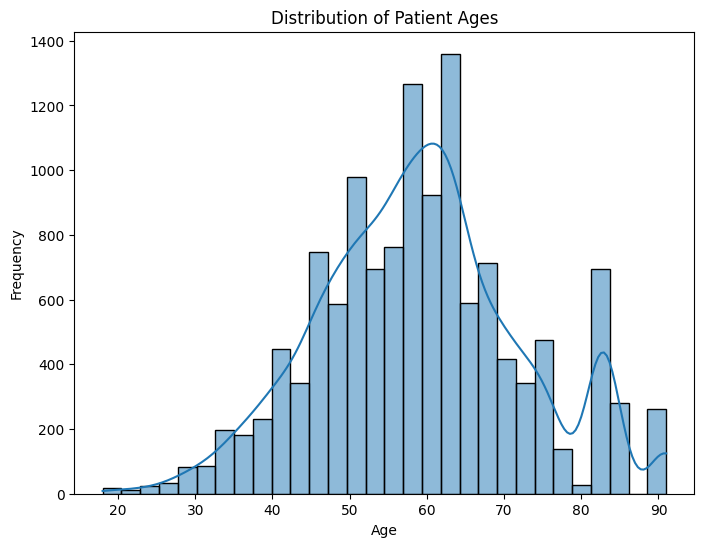

In [15]:

# Distribution of Patient Ages
plt.figure(figsize=(8, 6))
sns.histplot(RawData['patient_age'], bins=30, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram displays the spread of patient ages within the dataset, offering a glimpse into the age makeup of the population.

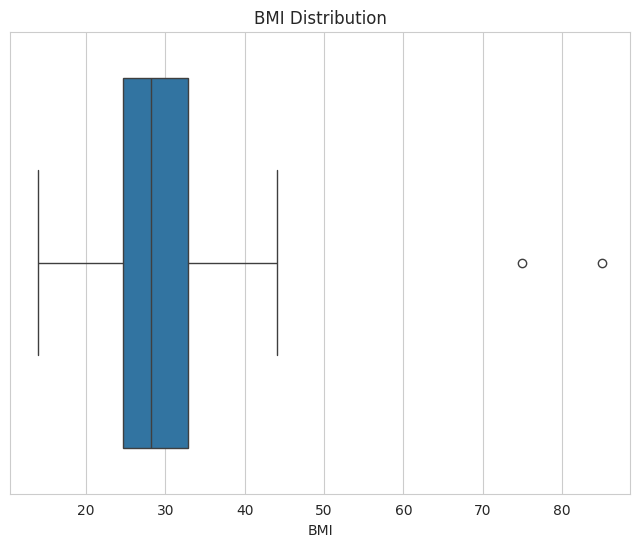

In [ ]:
# BMI Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bmi'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

This box plot illustrates the distribution of BMI (Body Mass Index), providing insights into the range, median, quartiles, and identification of outliers. It serves as a useful tool for assessing the nutritional status of the patient cohort.

In [9]:
# Suppose we have a DataFrame named 'data', with 'DiagPeriodL90D' being the specific column of interest
number_of_rows_with_1 = (RawData['DiagPeriodL90D'] == 1).sum()

print(number_of_rows_with_1)


number_of_rows_with_0 = (RawData['DiagPeriodL90D'] == 0).sum()

print(number_of_rows_with_0)


8060
4846


Remove columns containing over 50% missing values.

In [10]:
# Need to calculate the percentage of missing values
missing_values_percentage = RawData.isnull().mean() * 100

# Need to identify those columns
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index

# need to drop them
data_cleaned = RawData.drop(columns=columns_to_drop)

# need to shape after dropping
columns_to_drop, data_cleaned.shape


(Index(['bmi', 'metastatic_first_novel_treatment',
        'metastatic_first_novel_treatment_type'],
       dtype='object'),
 (12906, 80))

Imputing missing values with median

In [14]:
from sklearn.impute import SimpleImputer

# Replace missing values in numerical columns with the median.
numeric_columns = data_cleaned.select_dtypes(include='number').columns
numeric_imputer = SimpleImputer(strategy='median')
data_cleaned[numeric_columns] = numeric_imputer.fit_transform(data_cleaned[numeric_columns])

# Fill missing values in categorical columns with the mode (most frequent category).
categorical_columns = data_cleaned.select_dtypes(include='object').columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_columns] = categorical_imputer.fit_transform(data_cleaned[categorical_columns])

# Verify if there are any remaining columns.
missing_values_after_imputation = data_cleaned.isnull().sum().sum()

missing_values_after_imputation


0

Outlier detection

In [ ]:
# we will create a function to identify outliers using the Interquartile Range (IQR) method.
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Generate a mask to identify rows that contain outliers.
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers_mask

# Utilize the function on each numeric column and aggregate the results to determine the total count of outlier occurrences.
outlier_counts = {col: detect_outliers(data_cleaned, col).sum() for col in numeric_columns}

outlier_counts


{'patient_id': 0,
 'patient_zip3': 0,
 'patient_age': 44,
 'population': 192,
 'density': 1092,
 'age_median': 62,
 'age_under_10': 171,
 'age_10_to_19': 254,
 'age_20s': 391,
 'age_30s': 375,
 'age_40s': 141,
 'age_50s': 131,
 'age_60s': 222,
 'age_70s': 316,
 'age_over_80': 470,
 'male': 549,
 'female': 549,
 'married': 153,
 'divorced': 26,
 'never_married': 26,
 'widowed': 319,
 'family_size': 142,
 'family_dual_income': 94,
 'income_household_median': 703,
 'income_household_under_5': 299,
 'income_household_5_to_10': 555,
 'income_household_10_to_15': 301,
 'income_household_15_to_20': 441,
 'income_household_20_to_25': 240,
 'income_household_25_to_35': 87,
 'income_household_35_to_50': 114,
 'income_household_50_to_75': 455,
 'income_household_75_to_100': 60,
 'income_household_100_to_150': 22,
 'income_household_150_over': 374,
 'income_household_six_figure': 138,
 'income_individual_median': 630,
 'home_ownership': 129,
 'housing_units': 195,
 'home_value': 1148,
 'rent_media

Removing Outliers

In [18]:
# Need to remove the outliers based on the IQR method for all numeric columns
for col in numeric_columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Need to filter out the outliers
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]

# need to shape of data after removing outliers
data_cleaned.shape


(2144, 80)

need to check if the datasetis balanced

1.0    0.611007
0.0    0.388993
Name: DiagPeriodL90D, dtype: float64


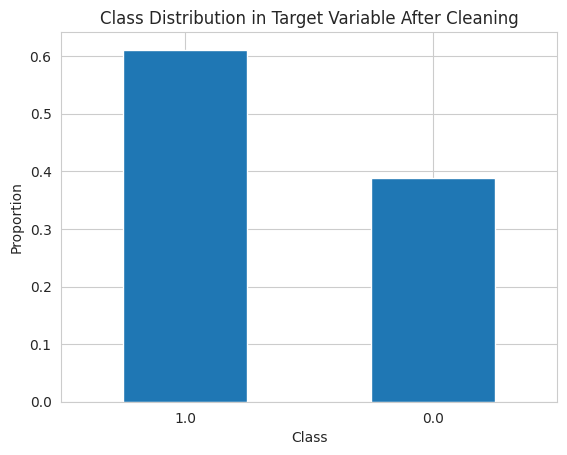

In [ ]:
target_column = 'DiagPeriodL90D'
y_cleaned = data_cleaned[target_column]
class_distribution_cleaned = y_cleaned.value_counts(normalize=True)

print(class_distribution_cleaned)

import matplotlib.pyplot as plt

class_distribution_cleaned.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution in Target Variable After Cleaning')
plt.xticks(rotation=0)
plt.show()


above data is Balanced the datset

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Re-identifying categorical and numerical columns in the original data
categorical_cols = data_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns

# Splitting the dataset into training and testing sets before preprocessing
X = data_cleaned.drop(columns=['DiagPeriodL90D'])
y = data_cleaned['DiagPeriodL90D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessor for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit the preprocessor and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE on the processed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Now, you can proceed to train your models using the balanced training set (X_train_smote, y_train_smote)

y_train_smote.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: DiagPeriodL90D, dtype: float64

Selecting features using a Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# # need to initialize the RandomForestClassifier
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42)

# # need to fit the model on the balanced dataset
rf_balanced.fit(X_train_smote, y_train_smote)

# # need to use SelectFromModel to select features based on importance
sel_balanced = SelectFromModel(rf_balanced, prefit=True)

# # need to transform the datasets to reduce to the selected features
X_train_selected = sel_balanced.transform(X_train_smote)
X_test_selected = sel_balanced.transform(X_test_processed)  # Note: SMOTE is not applied to test data

# # You are now able to utilize X_train_selected and X_test_selected for training and evaluating your models.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# need to initialize the MinMaxScaler
scaler = MinMaxScaler()

# need to fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# need to define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),

}

# Prepare a dictionary to store the results
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Store the results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Display the results
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Logistic Regression:
  Accuracy: 0.7949
  Precision: 0.8085
  Recall: 0.7502
  F1 Score: 0.7631

SVM:
  Accuracy: 0.7972
  Precision: 0.8064
  Recall: 0.7558
  F1 Score: 0.7681




The accuracy in both models is nearly identical under the assumption of linear relationships.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

scaler = MinMaxScaler()
# need to define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


# need to initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# need to initialize the GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV

grid_search.fit(X_train_scaled, y_train_smote)

# Best estimator
best_gb = grid_search.best_estimator_

# need to predict on the test set with the best estimator
y_pred = best_gb.predict(X_test_scaled)

# need to evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# need to display the best parameters and the evaluation metrics
print('Gradient Boosting')
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Gradient Boosting
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.8135
Precision: 0.8504
Recall: 0.7628
F1 Score: 0.7793


Gradient Boosting, with its enhanced accuracy of 81%, stands out for its ability to understand intricate patterns and manage diverse data types and relationships. Compared to Logistic Regression and SVM, which are strong methods in their own regard, Gradient Boosting excels particularly in handling complex nonlinear patterns and significant feature interactions, resulting in superior performance.
